<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-signal" data-toc-modified-id="Load-signal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load signal</a></span></li><li><span><a href="#Compute-loudness-of-the-whole-signal" data-toc-modified-id="Compute-loudness-of-the-whole-signal-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Compute loudness of the whole signal</a></span></li><li><span><a href="#Compute-loudness-per-signal-blocks" data-toc-modified-id="Compute-loudness-per-signal-blocks-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Compute loudness per signal blocks</a></span></li></ul></div>


# How to compute acoustic Loudness according to Zwicker method for stationary signals
This tutorial explains how to use MOSQITO to compute the acoustic loudness of a signal according to the Zwicker method for stationary signals (as per ISO 532-1 section 5). For more information on the implementation and validation of the metric, you can refer to the [documentation](../docs/loudness_zwst.md).

The following commands are used to import the necessary functions.

In [1]:
# Add MOSQITO to the Python path
import sys
sys.path.append('..')

# To get inline plots (specific to Jupyter notebook)
%matplotlib notebook

# Import numpy
import numpy as np
# Import plot function
import matplotlib.pyplot as plt
# Import mosqito functions
from mosqito.utils import load
from mosqito.sq_metrics import loudness_zwst

# Import MOSQITO color sheme [Optional]
from mosqito import COLORS

## Load signal
In this tutorial, the signal is imported from a .wav file. The tutorial [Audio signal basic operations](./tuto_signal_basic_operations.ipynb) gives more information about the syntax of the import and the other supported file types. You can use any .wav file to perform the tutorial or you can download the [pink noise signal](../validations/sq_metrics/loudness_zwst/input/ISO_532-1/Test%20signal%205%20%28pinknoise%2060%20dB%29.wav) from MOSQITO that is used in the following.

<IPython.core.display.Javascript object>


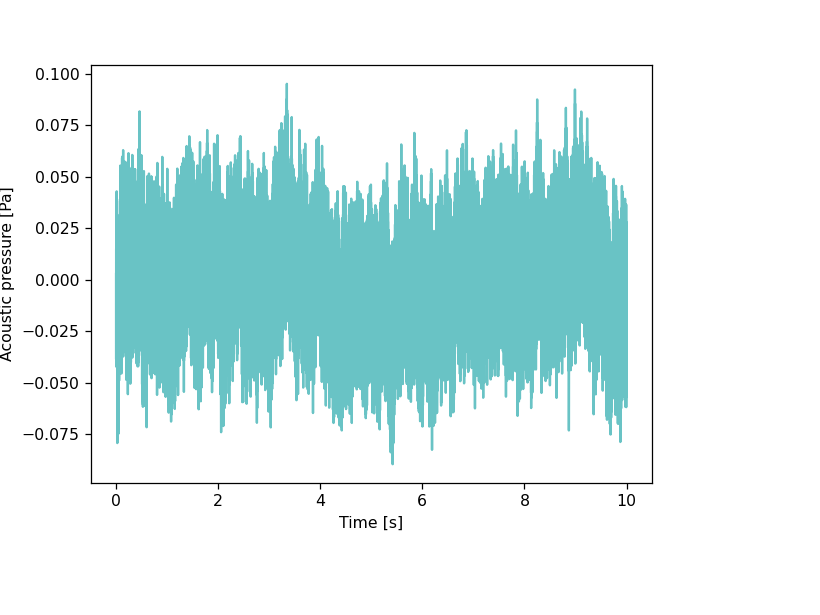

Text(0, 0.5, 'Acoustic pressure [Pa]')

In [2]:
# Define path to the .wav file
# To be replaced by your own path
path = "../validations/sq_metrics/loudness_zwst/input/ISO_532-1/Test signal 5 (pinknoise 60 dB).wav"
# load signal
sig, fs = load(path, wav_calib=2 * 2 **0.5)
# plot signal
t = np.linspace(0, (len(sig) - 1) / fs, len(sig))
plt.figure(1)
plt.plot(t, sig, color=COLORS[0])
plt.xlabel('Time [s]')
plt.ylabel('Acoustic pressure [Pa]')

## Compute loudness of the whole signal
The acoustic loudness is computed by using the following command line. In addition to the signal (as ndarray) and the sampling frequency, the function takes 1 input argument: "field_type" that can be set to "free" or "diffuse" depending on the environment of the audio signal recording.

In [3]:
N, N_specific, bark_axis = loudness_zwst(sig, fs, field_type="free")

The function return the Loudness of the signal :

In [4]:
print("N_zwst = {:.1f} sone".format(N) )

N_zwst = 10.4 sone


The specific loudness over critical band rate is also computed :

<IPython.core.display.Javascript object>


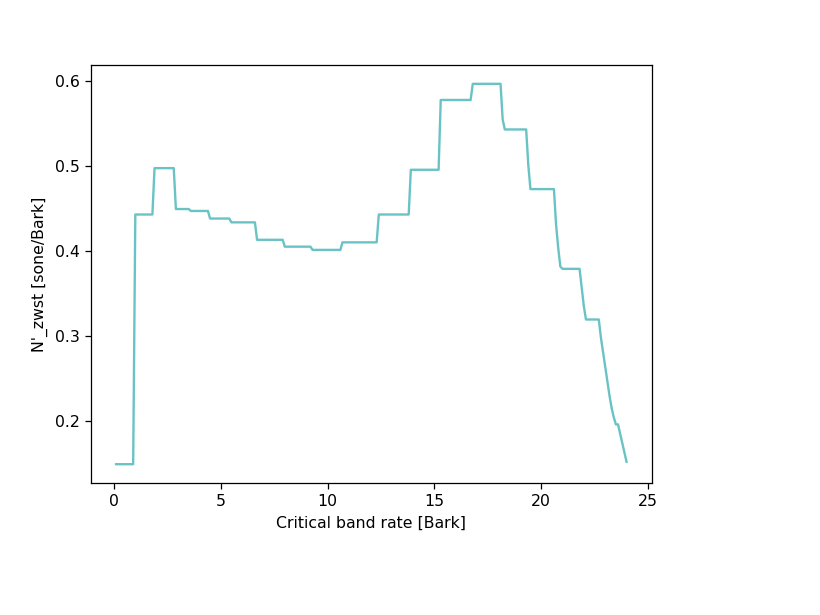

Text(0, 0.5, "N'_zwst [sone/Bark]")

In [5]:
plt.figure(2)
plt.plot(bark_axis, N_specific, color=COLORS[0])
plt.xlabel("Critical band rate [Bark]")
plt.ylabel("N'_zwst [sone/Bark]")

## Compute loudness per signal blocks
Coming soon...

---

In [6]:
from datetime import date
print("Tutorial generation date:", date.today().strftime("%B %d, %Y"))

Tutorial generation date: February 25, 2022
